# Project 2: Investigate a Dataset (No-Show Appointments)
### By: Osama Taha

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About the Dataset
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment (in other words, What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)



### Notes:
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
# Importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# I renamed the orginal dataset to be "Raw_data.csv" and here, I read it:
df = pd.read_csv('Raw_data.csv')
df.head()

# To be honest, the MS-Excel view of the dataset is much better for the eyes.

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

From the a/m result, I noticed that no spaces in the column names need to be replaced by "_".

In [3]:
# Let's have an overall look of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the a/m result, we can conclude the following:
* The "SchedulDay" & "AppointmentDay" will need to be converted to date insteaed of strings later in the cleaning phase.
* We have no null data to be cleaned.

In [4]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [5]:
# Let's check the unique values of each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the a/m result, I noticed that "Handcap" has five levels (not only 1 or 0 like the other medical conditions).

### Data Cleaning

* Need to check the duplicated records.

* Extraneous Columns to be dropped : "PatientId" & "AppointmentID" as they are dummy numbers and do not indicate anything.

* Column Labels which need to be cleaned to be more expressive : "Neighbourhood" to be "Hospital_location" & "Scholarship" to be "Welfare_prog".

* "No-Show" Column Label needs to be cleaned to avoid any syntax errors due to using "-" instead of "_".

* Removing the "Z" and replacing "T" with space in the "ScheduledDay" & "AppointmentDay" then convert them to date.

In [6]:
# Need to check the duplicated records.
df.duplicated().sum()

0

* From the a/m result, no duplicated records to be dropped.

* We already concluded from the "General Properties" section that there is no null data to be cleaned.

In [7]:
# Check before changes:
print('Shape Before Dropping : ',df.shape)

# dropping Extraneous Columns:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# confirm changes:
print('Shape After Dropping : ',df.shape)
df.head(1)

Shape Before Dropping :  (110527, 14)
Shape After Dropping :  (110527, 12)


Gender          ScheduledDay        AppointmentDay  Age    Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62  JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   

  No-show  
0      No

In [8]:
# Column Labels cleaning:
df.rename(columns={'Neighbourhood': 'Hospital_location'}, inplace=True)
df.rename(columns={'Scholarship': 'Welfare_prog'}, inplace=True)
df.rename(columns={'No-show': 'No_show'}, inplace=True)

# confirm changes
df.head(1)

Gender          ScheduledDay        AppointmentDay  Age Hospital_location  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62   JARDIM DA PENHA   

   Welfare_prog  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0             0             1         0           0        0             0   

  No_show  
0      No

We already concluded from the "General Properties" section that no spaces in the column names need to be replaced by "_".

In [9]:
# Removing the "Z" and replacing "T" with space in the "ScheduledDay" & "AppointmentDay":

for c in ['ScheduledDay','AppointmentDay']:
    df[c] = df[c].apply(lambda x: x.replace("T", " "))
    df[c] = df[c].apply(lambda x: x.replace("Z", ""))
    
# by using for-loop, I reduced the needed code from 4 lines to be 3 lines only.

    
# Check after changes:
df.head(1)

Gender         ScheduledDay       AppointmentDay  Age Hospital_location  \
0      F  2016-04-29 18:38:08  2016-04-29 00:00:00   62   JARDIM DA PENHA   

   Welfare_prog  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0             0             1         0           0        0             0   

  No_show  
0      No

In [10]:
# converting "ScheduledDay" & "AppointmentDay" to date instead of string:

df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')

# I didn't use for-loop here as there will be no reduction in the number of lines.


# Check after changes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Gender             110527 non-null  object        
 1   ScheduledDay       110527 non-null  datetime64[ns]
 2   AppointmentDay     110527 non-null  datetime64[ns]
 3   Age                110527 non-null  int64         
 4   Hospital_location  110527 non-null  object        
 5   Welfare_prog       110527 non-null  int64         
 6   Hipertension       110527 non-null  int64         
 7   Diabetes           110527 non-null  int64         
 8   Alcoholism         110527 non-null  int64         
 9   Handcap            110527 non-null  int64         
 10  SMS_received       110527 non-null  int64         
 11  No_show            110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


I didn't know the exact syntax of the datetime64 so I googled it and found the answer in this link:
[https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/]

<a id='eda'></a>
## Exploratory Data Analysis

**Research Questions:** 
1. Does the Gender has an impact ?
2. Does the Age has an impact ?
3. Does the Hospital_Location has an impact ?
4. Is being a member in the Welfare_Program has an impact ?
5. What patient health condition has an impact ?
6. what is the handcap level impact ?

### 1. Does the Gender has an Impact ?

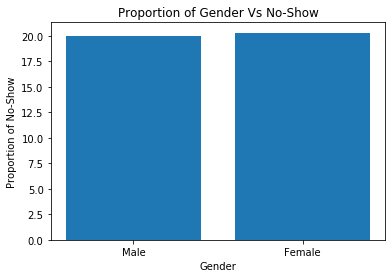

In [11]:
# To take the into concideration the variance between the number of male and female patients, we are going to use the proportional as follows:
# male porportional = number of no show male patients/total number of male patients *100
male_no_show_proportion=df[(df.Gender == "M") & (df.No_show == "Yes")].count()['Gender']/df[(df.Gender == "M")].count()['Gender']*100

# female porportional = number of no show female patients/total number of female patients *100
female_no_show_proportion=df[(df.Gender == "F") & (df.No_show == "Yes")].count()['Gender']/df[(df.Gender == "F")].count()['Gender']*100

# Now, let's  plot the results:
plt.bar(["Male", "Female"], [male_no_show_proportion, female_no_show_proportion])
plt.title("Proportion of Gender Vs No-Show")
plt.xlabel("Gender")
plt.ylabel("Proportion of No-Show");

**From the graph we can see that Females have slightly more no-show cases than males.**

### 2. Does the Age has an impact ?

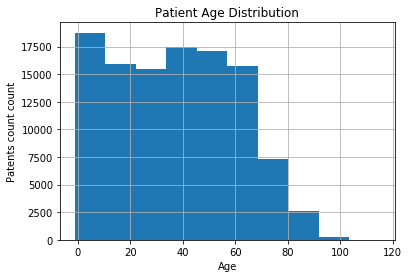

In [12]:
# Before we address this question, let's first check the distribution of patient ages:

df.Age.hist()
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Patents count count");

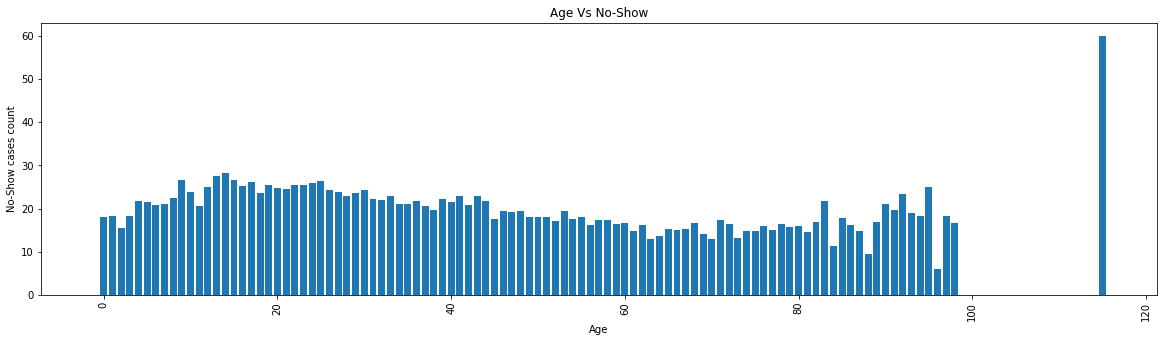

In [13]:
# To take the into concideration the variance between the number of patients per age,
# we are going to use the proportional as follows:

# First, we create an empty dictionary to be filled by ages and propotional precentage:
no_show_age={}

# Then we create a list of all patient ages:
Ages = df.Age.unique()

# Now, we use the list as a dictionary keys and fill the values using the proportional equation as follows:
for H in Ages:
    no_show_age[H]=df[(df.Age == H) & (df.No_show == "Yes")].count()['Gender']/df[(df.Age == H)].count()['Gender']*100

# Finall, we plot the dictionary:
f, ax = plt.subplots(figsize=(20,5))
plt.bar(no_show_age.keys(),no_show_age.values())
plt.title("Age Vs No-Show")
plt.xlabel("Age")
plt.ylabel("No-Show cases count")
plt.xticks(rotation=90);

#### From the graph we can see the following:
* The proportional precentage of the no-show cases are relatively low in the age range 60-90.
* The proportional precentage of the no-show cases are relatively high in the age ranges 10-30 & 90-100.
* I think the tall bar at the right is an outlire and can be ignored.

### Notes:
* I got the unique() function from this link [https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/]
* How to plot a dictionary [https://www.kite.com/python/answers/how-to-plot-a-bar-chart-using-a-dictionary-in-matplotlib-in-python]


### 3. Does the Hospital_Location has an impact ?

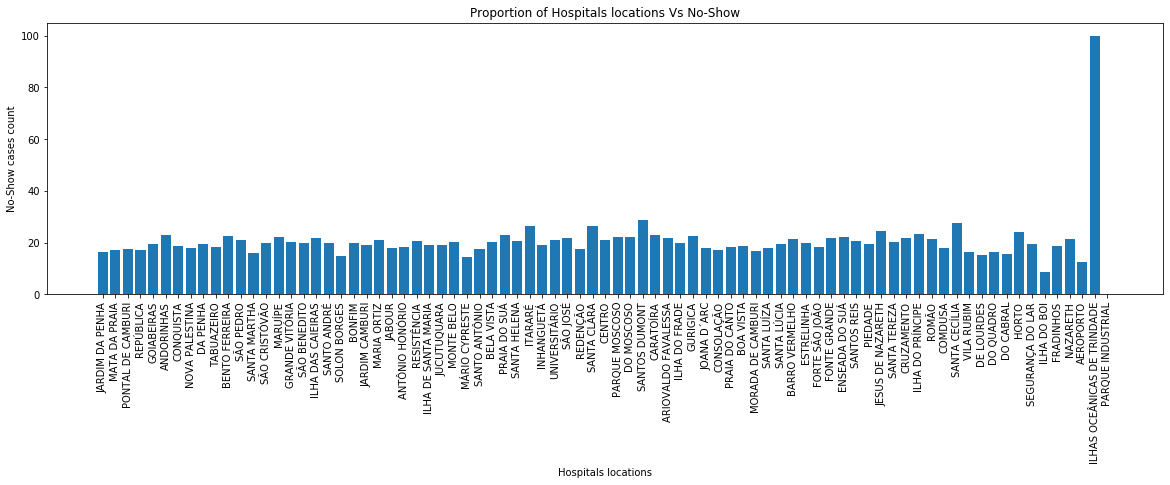

In [14]:
# To take the into concideration the variance between the number of patients per hospital,
# we are going to use the proportional as follows:

# First, we create an empty dictionary to be filled by Hospital locations and propotional precentage:
no_show_hospitals={}

# Then we create a list of all hospital locations:
Hospitals_locations = df.Hospital_location.unique()

# Now, we use the list as a dictionary keys and fill the values using the proportional equation as follows:
for H in Hospitals_locations:
    no_show_hospitals[H]=df[(df.Hospital_location == H) & (df.No_show == "Yes")].count()['Gender']/df[(df.Hospital_location == H)].count()['Gender']*100

# Finall, we plot the dictionary:
plt.subplots(figsize=(20,5))
plt.bar(no_show_hospitals.keys(),no_show_hospitals.values())
plt.title("Proportion of Hospitals locations Vs No-Show")
plt.xlabel("Hospitals locations")
plt.ylabel("No-Show cases count")
plt.xticks(rotation=90);

From the a/m result, we can conclude that there is difference in the proportions of the no-show cases between the hospitals but we have two Hospitals with segnificant counts:

   **1. ILHAS OCEÃ‚NICAS DE TRINDADE :** Has more than tripple the average proportion (need further investigation).
   
   **2. PARQUE INDUSTRIAL :** Has zero no-show cases (need further investigation).

### 4. Is being a member in the Welfare_Program has an impact ?

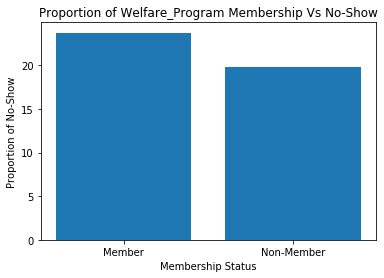

In [15]:
# To take the into concideration the variance between the number of Member and Non-Member patients, we are going to use the proportional as follows:
# Members porportional = number of no-show member patients/total number of member patients *100
member_no_show_proportion=df[(df.Welfare_prog == 1) & (df.No_show == "Yes")].count()['Gender']/df[(df.Welfare_prog == 1)].count()['Gender']*100

# Non-Members porportional = number of no-show non-member patients/total number of non-member patients *100
non_member_no_show_proportion=df[(df.Welfare_prog == 0) & (df.No_show == "Yes")].count()['Gender']/df[(df.Welfare_prog == 0)].count()['Gender']*100

# Now, let's  plot the results:
plt.bar(["Member", "Non-Member"], [member_no_show_proportion, non_member_no_show_proportion])
plt.title("Proportion of Welfare_Program Membership Vs No-Show")
plt.xlabel("Membership Status")
plt.ylabel("Proportion of No-Show");


**From the graph we can see that Member Patients have more no-show cases than Non-Member ones.**

### 5. What patient's health condition has an impact ?

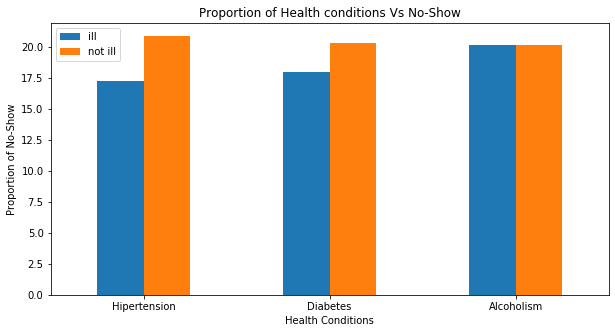

In [16]:
# using the same concept of proportional precentage:

# Getting Hipertension proportional precentages:
Hip=df[(df.Hipertension == 1) & (df.No_show == "Yes")].count()['Gender']/df[(df.Hipertension == 1)].count()['Gender']*100
NHip=df[(df.Hipertension == 0) & (df.No_show == "Yes")].count()['Gender']/df[(df.Hipertension == 0)].count()['Gender']*100


# Getting Diabetes proportional precentages:
Dia=df[(df.Diabetes == 1) & (df.No_show == "Yes")].count()['Gender']/df[(df.Diabetes == 1)].count()['Gender']*100
NDia=df[(df.Diabetes == 0) & (df.No_show == "Yes")].count()['Gender']/df[(df.Diabetes == 0)].count()['Gender']*100


# Getting Alcoholism proportional precentages:
Alc=df[(df.Alcoholism == 1) & (df.No_show == "Yes")].count()['Gender']/df[(df.Alcoholism == 1)].count()['Gender']*100
NAlc=df[(df.Alcoholism == 0) & (df.No_show == "Yes")].count()['Gender']/df[(df.Alcoholism == 0)].count()['Gender']*100


# Plotting:
index = ["Hipertension", "Diabetes", "Alcoholism"]
health_cond = [Hip, Dia, Alc]
healthy = [NHip, NDia, NAlc]

ill = pd.DataFrame({'ill': health_cond,'not ill': healthy}, index=index)
ill.plot.bar(rot=0,figsize=(10,5));
plt.title("Proportion of Health conditions Vs No-Show")
plt.xlabel("Health Conditions")
plt.ylabel("Proportion of No-Show");


#### From the graph we can see the following:
* Patients with Hipertention illness has smaller proportional than the not-ill ones.
* Patients with Diabets illness has smaller proportional than the not-ill ones.
* Alcoholism has no impact in the no-show cases (ill proportional almost equal the not-ill proportional).
* Patients with Alcoholism health condition have larger proportional precentage than Diabetes ones than Hipertension ones.


**Note: I got the plot code from this site [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html]**


### 6. What patient's Handcap level an impact ?

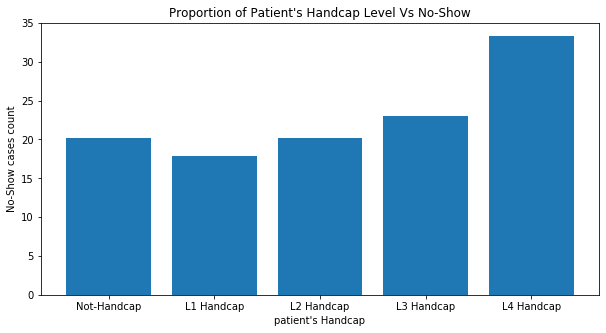

In [17]:
# using the same concept of proportional precentage:

# Getting the proportional precentage of each handcap level:
L0=df[(df.Handcap == 0) & (df.No_show == "Yes")].count()['Gender']/df[(df.Handcap == 0)].count()['Gender']*100
L1=df[(df.Handcap == 1) & (df.No_show == "Yes")].count()['Gender']/df[(df.Handcap == 1)].count()['Gender']*100
L2=df[(df.Handcap == 2) & (df.No_show == "Yes")].count()['Gender']/df[(df.Handcap == 2)].count()['Gender']*100
L3=df[(df.Handcap == 3) & (df.No_show == "Yes")].count()['Gender']/df[(df.Handcap == 3)].count()['Gender']*100
L4=df[(df.Handcap == 4) & (df.No_show == "Yes")].count()['Gender']/df[(df.Handcap == 4)].count()['Gender']*100


# Plotting:
plt.subplots(figsize=(10,5))
plt.bar(["Not-Handcap", "L1 Handcap", "L2 Handcap", "L3 Handcap", "L4 Handcap"], [L0, L1, L2, L3, L4])
plt.title("Proportion of Patient's Handcap Level Vs No-Show")
plt.xlabel("patient's Handcap")
plt.ylabel("No-Show cases count");

#### From the graph we can see that Patients with L4 Handcap have the largest proportional precentage tand L1 have the lowest.


# Saving Changes in a CSV file:

In [18]:
df.to_csv('Final.csv', index=False)

<a id='conclusions'></a>
## Conclusions

### Gender Impact:
* Females have slightly more no-show probability than males.

### Age Impact:
* The proportional precentage of the no-show cases are relatively low in the age range 60-90.
* The proportional precentage of the no-show cases are relatively high in the age ranges 10-30 & 90-100.

### Hospital location Impact:
* There is difference in the proportions of the no-show cases between the hospitals but we have two Hospitals with segnificant counts:

    1. ILHAS OCEÃ‚NICAS DE TRINDADE : Has more than tripple the average proportion (need further investigation).

    2. PARQUE INDUSTRIAL : Has zero no-show cases (need further investigation).



### Welfare Program Impact:
* Member Patients have more no-show cases than Non-Member ones

### Health conditions Impact:
* Patients with Hipertention illness has smaller proportional than the not-ill ones.
* Patients with Diabets illness has smaller proportional than the not-ill ones.
* Alcoholism has no impact in the no-show cases (ill proportional almost equal the not-ill proportional).
* Patients with Alcoholism health condition have larger proportional precentage than Diabetes ones than Hipertension ones.

### Handcap Impact:
* Patients with L4 Handcap have the largest proportional precentage tand L1 have the lowest.

### Limitations

* Data set is about 11K records, it would be better if we have more records (let's say 40K). This will be more efficient (for example, the differences between the hospital locations/Ages plots will be more significant.

* The significance of the factors provided in the data set needs to be tested to confirm or delete the impact of such factors on our analysis. This can be tested using hypothesis testing and computing the p-values for factors such as the different health conditions of the patients. 



### Final Note

Using the proportional precentage made the codes more complex but it gave me an accurate results ( I could just fintel on "No_show" = Yes and work on them but the results wouldn't be that accurate).